<a href="https://colab.research.google.com/github/zhsimsek/seasfire/blob/main/Zeynep_Project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

September 19th 2025

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
!pip install -q xarray zarr fsspec scikit-learn matplotlib
!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
!pip install Cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
!pip install xarray zarr fsspec
!pip install scikit-learn
!pip install matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libproj-dev is already the newest version (9.3.1-1~jammy0).
proj-bin is already the newest version (9.3.1-1~jammy0).
proj-data is already the newest version (9.3.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#open dataset
zarr_path = "/content/drive/MyDrive/seasfire_v0.4.zarr"
ds = xr.open_zarr(zarr_path, consolidated=True)
print("Dataset loaded.")
print(ds)

Dataset loaded.
<xarray.Dataset> Size: 164GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/59)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    biomes                          (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966

In [5]:
#subset on california
lat_min, lat_max = 32, 42
lon_min, lon_max = -125, -114

ds_ca = ds.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)
print("Subset to California:")
print(ds_ca)

Subset to California:
<xarray.Dataset> Size: 279MB
Dimensions:                         (latitude: 40, longitude: 44, time: 966)
Coordinates:
  * latitude                        (latitude) float64 320B 41.88 ... 32.12
  * longitude                       (longitude) float64 352B -124.9 ... -114.1
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/59)
    area                            (latitude, longitude) float32 7kB dask.array<chunksize=(40, 44), meta=np.ndarray>
    biomes                          (latitude, longitude) float32 7kB dask.array<chunksize=(40, 44), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 7MB dask.array<chunksize=(966, 40, 44), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 7MB dask.array<chunksize=(966, 40, 44), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 7MB dask.array<chunksize=(966, 40

In [6]:
# List of variables relevant for fire -> climate impact
fire_climate_vars = [
    # Fire activity / emissions
    "cams_co2fire",
    "cams_frpfire",
    "fcci_ba",
    "gfed_ba",
    "gwis_ba",
    "fwi_max",
    "fwi_mean",
    "drought_code_max",
    "drought_code_mean",

    # Vegetation / land surface
    "lai",
    "ndvi",
    "lst_day",
    # "lccs_class_0",
    # "lccs_class_1",
    # "lccs_class_2",
    # "lccs_class_3",
    # "lccs_class_4",
    # "lccs_class_5",
    # "lccs_class_6",
    # "lccs_class_7",
    # "lccs_class_8",
    "lsm",

    # Climate / meteorology
    "t2m_max",
    "t2m_mean",
    "t2m_min",
    "tp",
    "rel_hum",
    "ws10",
    "vpd",
    "mslp",
    "skt",
    "sst",
    "ssr",
    "ssrd",
    "swvl1",

    # Human factors
    "pop_dens"
]

# Select only the variables of interest
ds_selected = ds_ca[fire_climate_vars]

# Load data into memory (optional, or work with lazy loading)
ds = ds_selected.load()

size_bytes = ds.nbytes
print(f"Dataset size: {size_bytes/1024**2:.2f} Mb")


Dataset size: 168.64 Mb


In [7]:
#preview one variable
print("\n📊 Example variable: rel_hum\n")
print(ds["rel_hum"])

# Optional: View summary stats
print(ds["rel_hum"].isel(time=0).mean().values)


📊 Example variable: rel_hum

<xarray.DataArray 'rel_hum' (time: 966, latitude: 40, longitude: 44)> Size: 7MB
array([[[66.81318 , 65.19232 , 65.851524, ..., 66.06671 , 73.99106 ,
         71.938644],
        [66.76458 , 64.53474 , 63.302246, ..., 62.630707, 69.20043 ,
         69.25991 ],
        [66.236046, 64.33343 , 62.70665 , ..., 62.207573, 64.08177 ,
         64.840645],
        ...,
        [72.614944, 71.965   , 70.73464 , ..., 20.824926, 21.144703,
         21.440207],
        [72.95277 , 72.427765, 71.443954, ..., 23.101387, 22.861944,
         21.819803],
        [73.20577 , 72.8813  , 72.13248 , ..., 24.746435, 24.688732,
         23.71809 ]],

       [[67.079926, 66.65024 , 66.16741 , ..., 82.96347 , 82.318405,
         81.47781 ],
        [67.65306 , 66.91563 , 66.405304, ..., 83.51518 , 81.91915 ,
         80.55112 ],
        [67.88138 , 67.53377 , 67.186424, ..., 79.29869 , 77.44414 ,
         74.32424 ],
...
        [70.422676, 70.58774 , 70.97319 , ..., 35.631645, 38.

In [8]:
print(ds.dims)           # Time, lat, lon
print(ds.coords)         # Coordinate values
print(ds.data_vars)      # Available variables
print(ds.time.values)    # Time coverage

FrozenMappingWarningOnValuesAccess({'time': 966, 'latitude': 40, 'longitude': 44})
Coordinates:
  * latitude   (latitude) float64 320B 41.88 41.62 41.38 ... 32.62 32.38 32.12
  * longitude  (longitude) float64 352B -124.9 -124.6 -124.4 ... -114.4 -114.1
  * time       (time) datetime64[ns] 8kB 2001-01-01 2001-01-09 ... 2021-12-27
Data variables:
    cams_co2fire       (time, latitude, longitude) float32 7MB 0.0 0.0 ... nan
    cams_frpfire       (time, latitude, longitude) float32 7MB 0.0 0.0 ... 0.0
    fcci_ba            (time, latitude, longitude) float32 7MB nan nan ... nan
    gfed_ba            (time, latitude, longitude) float32 7MB nan nan ... nan
    gwis_ba            (time, latitude, longitude) float32 7MB nan nan ... 0.0
    fwi_max            (time, latitude, longitude) float32 7MB nan nan ... 37.96
    fwi_mean           (time, latitude, longitude) float32 7MB nan nan ... 24.24
    drought_code_max   (time, latitude, longitude) float32 7MB nan ... 2.008e+03
    drought_co

Variable Exploration and visiualizations

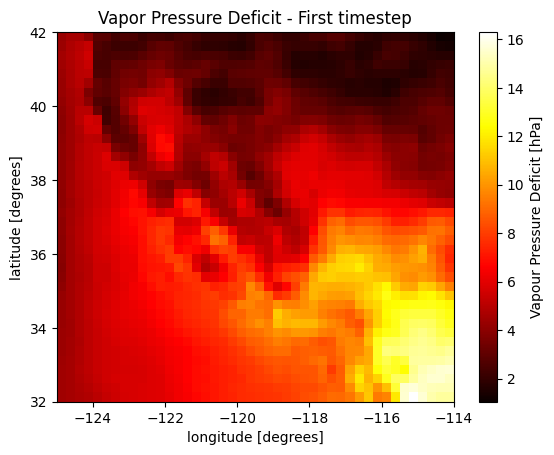

In [9]:
ds['vpd'].isel(time=0).plot(cmap='hot')
plt.title("Vapor Pressure Deficit - First timestep")
plt.show()

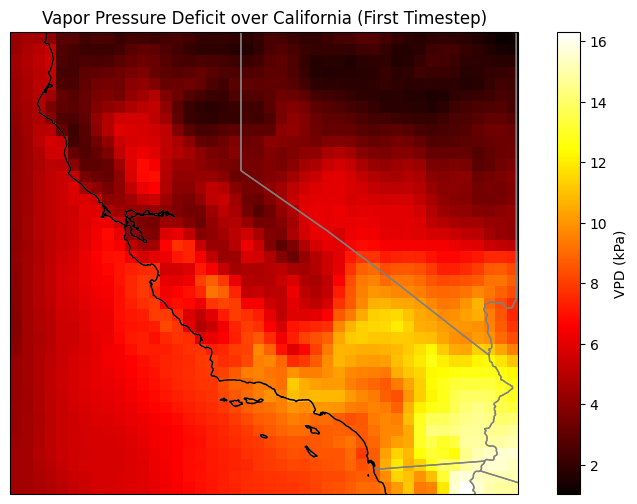

In [10]:
# Select VPD at first time step
vpd = ds['vpd'].isel(time=0)

# Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

vpd.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='hot', cbar_kwargs={'label': 'VPD (kPa)'})

# Add map features
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-125, -114, 32, 42])  # California bounds

plt.title("Vapor Pressure Deficit over California (First Timestep)")
plt.show()

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:512: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:512: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  return super().draw(renderer=renderer, **kwargs)


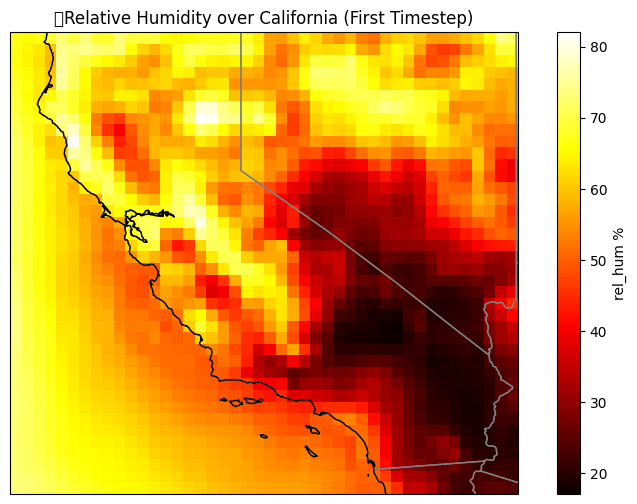

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:512: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:512: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  return super().draw(renderer=renderer, **kwargs)


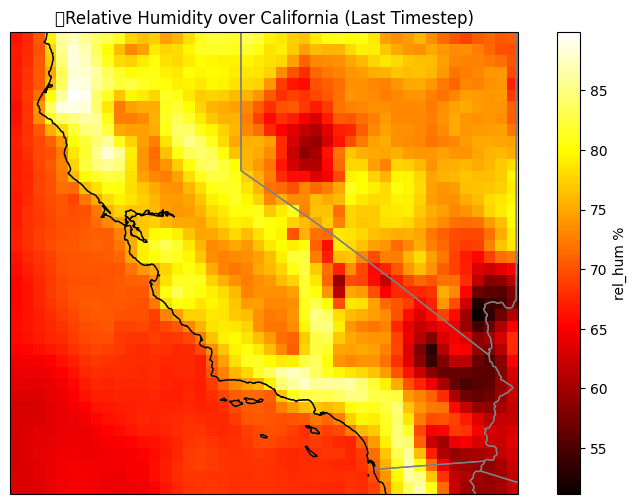

In [11]:
# Select rel_hum at first time step
rel_hum0 = ds['rel_hum'].isel(time=0)

# Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

rel_hum0.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='hot', cbar_kwargs={'label': 'rel_hum %'})

# Add map features
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-125, -114, 32, 42])  # California bounds

plt.title("	Relative Humidity over California (First Timestep)")
plt.show()

# Select rel_hum at last time step
rel_hum965 = ds['rel_hum'].isel(time=965)

# # Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

rel_hum965.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='hot', cbar_kwargs={'label': 'rel_hum %'})

# Add map features
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-125, -114, 32, 42])  # California bounds

plt.title("	Relative Humidity over California (Last Timestep)")
plt.show()

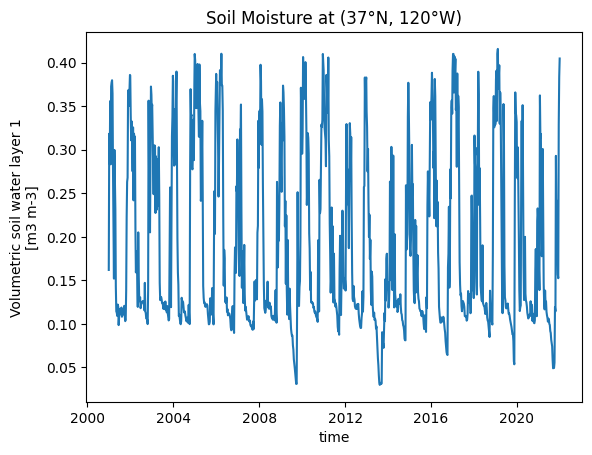

In [12]:
#Time series varies at one location
loc = ds_ca.sel(latitude=37.0, longitude=-120.0, method='nearest')
loc['swvl1'].plot()
plt.title("Soil Moisture at (37°N, 120°W)")
plt.show()

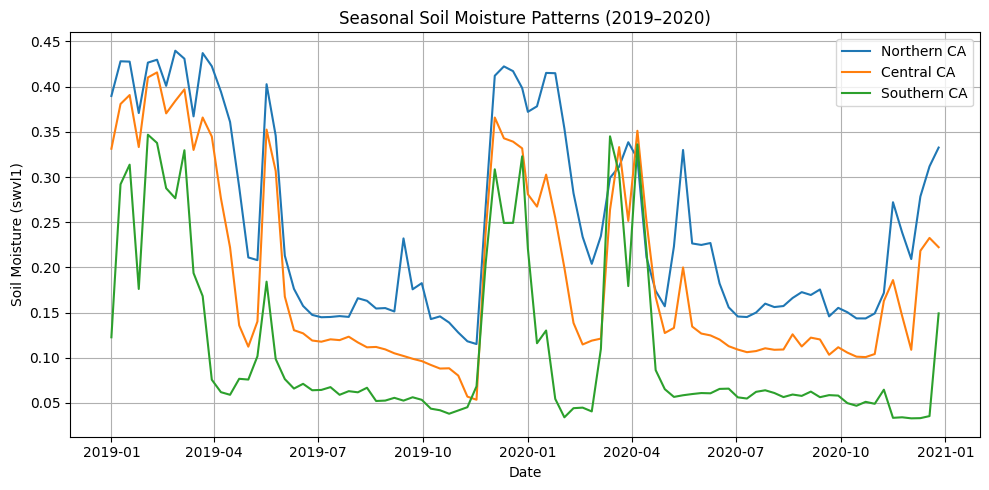

In [13]:
# Select 2 years (e.g., 2019–2020)
ds_seasonal = ds_ca.sel(time=slice("2019-01-01", "2020-12-31"))

# Pick a few lat/lon points (example locations in CA)
locations = [
    {"name": "Northern CA", "lat": 40.0, "lon": -122.5},
    {"name": "Central CA", "lat": 37.0, "lon": -120.0},
    {"name": "Southern CA", "lat": 34.0, "lon": -118.5},
]

# Plot soil moisture over time for each location
plt.figure(figsize=(10, 5))
for loc in locations:
    point = ds_seasonal['swvl1'].sel(
        latitude=loc["lat"], longitude=loc["lon"], method="nearest"
    )
    plt.plot(ds_seasonal.time, point, label=loc["name"])

plt.title("Seasonal Soil Moisture Patterns (2019–2020)")
plt.ylabel("Soil Moisture (swvl1)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
#check for missing variables
for var in ['swvl1', 'vpd', 'rel_hum', 'ndvi', 'lai', 'gfed_ba']:
    print(f"{var}: Missing values = {ds_ca[var].isnull().sum().item()}")

swvl1: Missing values = 532266
vpd: Missing values = 0
rel_hum: Missing values = 0
ndvi: Missing values = 531029
lai: Missing values = 478350
gfed_ba: Missing values = 823170


In [15]:
#Correlation Matrix
subset = ds_ca[['swvl1', 'vpd', 'rel_hum', 'ndvi', 'lai', 'gfed_ba']].mean(dim=['latitude', 'longitude'])
df = subset.to_dataframe().dropna()
print(df.corr())

            swvl1       vpd   rel_hum      ndvi       lai   gfed_ba
swvl1    1.000000 -0.820963  0.823901 -0.408803 -0.568003 -0.302459
vpd     -0.820963  1.000000 -0.813717  0.462552  0.740648  0.387563
rel_hum  0.823901 -0.813717  1.000000 -0.479716 -0.727545 -0.270383
ndvi    -0.408803  0.462552 -0.479716  1.000000  0.747973  0.112651
lai     -0.568003  0.740648 -0.727545  0.747973  1.000000  0.208488
gfed_ba -0.302459  0.387563 -0.270383  0.112651  0.208488  1.000000


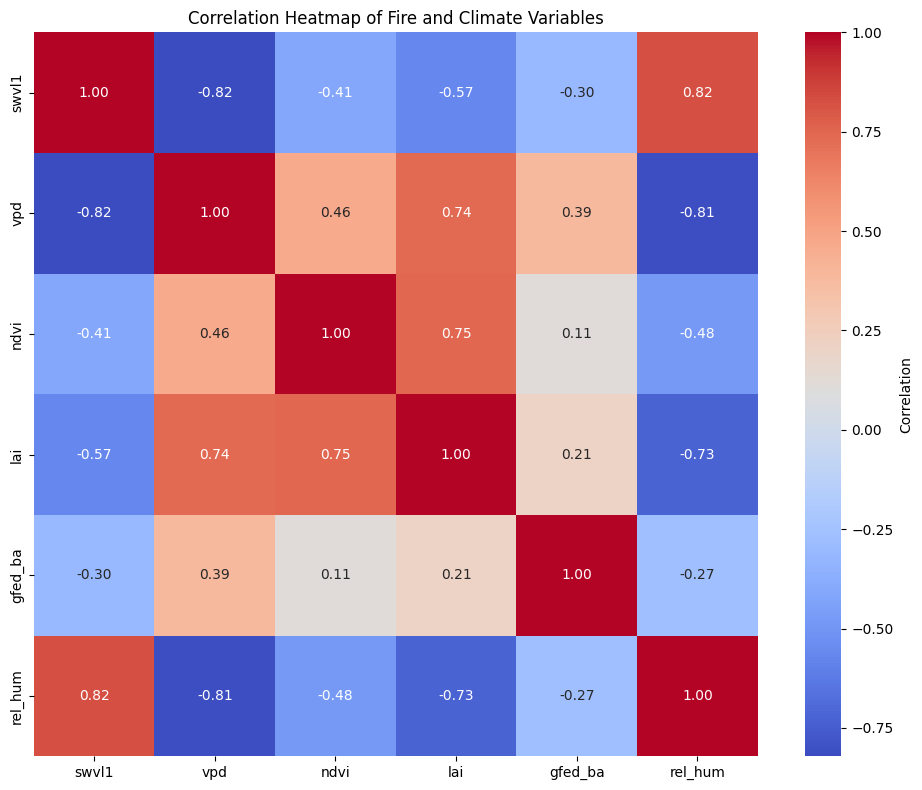

In [16]:
import seaborn as sns
selected_vars = ['swvl1', 'vpd', 'ndvi', 'lai', 'gfed_ba', 'rel_hum']
corr_matrix = df[selected_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"label": "Correlation"})
plt.title("Correlation Heatmap of Fire and Climate Variables")
plt.tight_layout()
plt.show()

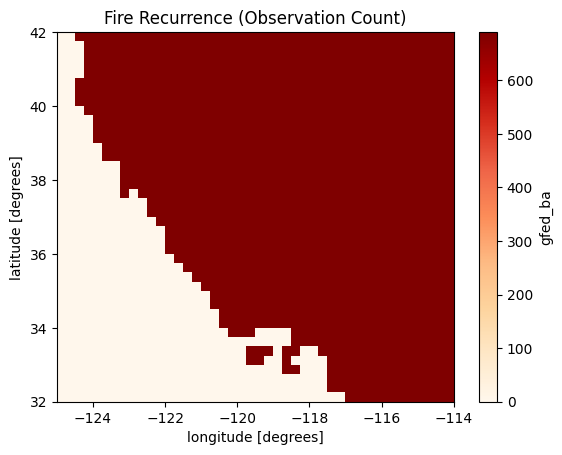

In [17]:
#histogram of fire observations
fire_counts = ds_ca['gfed_ba'].count(dim='time')  # Number of non-NaN fire observations
fire_counts.plot(cmap='OrRd')
plt.title("Fire Recurrence (Observation Count)")
plt.show()

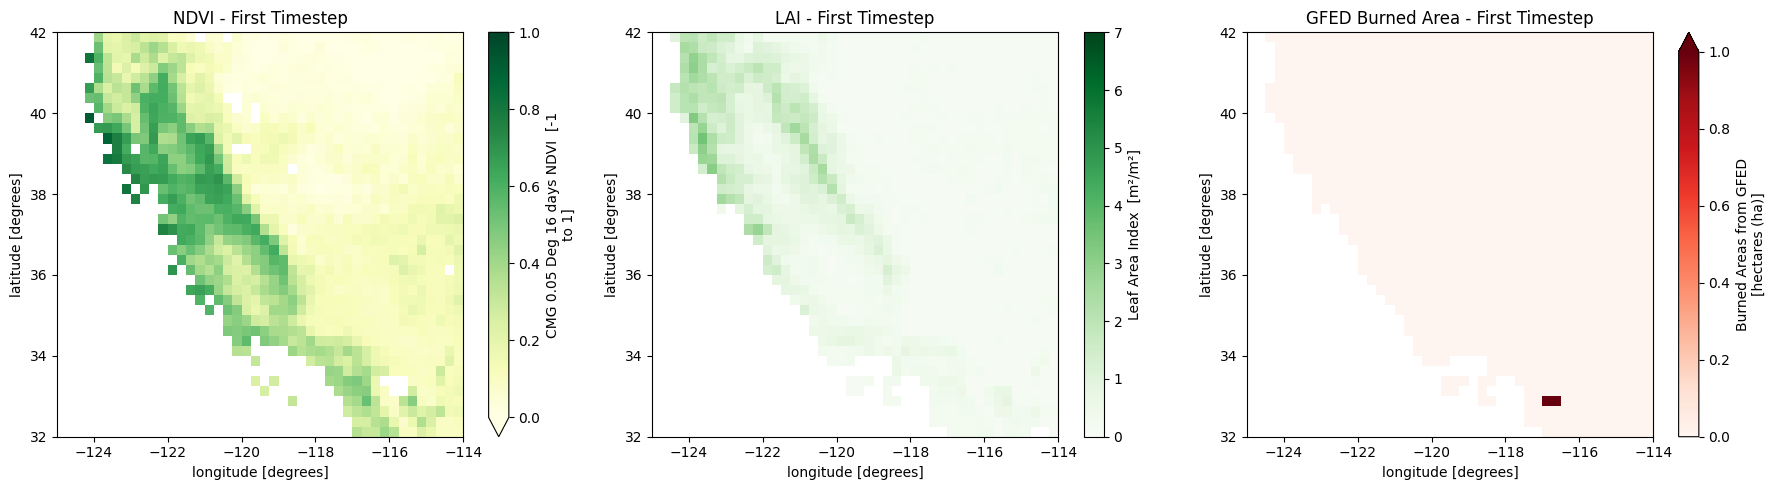

In [18]:
#Visualized 'ndvi' 'lai' 'gfed_ba'
#Setup a shared colored scale
vmin_ndvi, vmax_ndvi = 0, 1
vmin_lai, vmax_lai = 0, 7  # typical LAI range
vmin_ba, vmax_ba = 0, 1    # burned area is usually 0 or fractional values

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# NDVI
ds_ca['ndvi'].isel(time=0).plot(ax=axes[0], cmap='YlGn', vmin=vmin_ndvi, vmax=vmax_ndvi)
axes[0].set_title("NDVI - First Timestep")

# LAI
ds_ca['lai'].isel(time=0).plot(ax=axes[1], cmap='Greens', vmin=vmin_lai, vmax=vmax_lai)
axes[1].set_title("LAI - First Timestep")

# GFED Burned Area
ds_ca['gfed_ba'].isel(time=0).plot(ax=axes[2], cmap='Reds', vmin=vmin_ba, vmax=vmax_ba)
axes[2].set_title("GFED Burned Area - First Timestep")

plt.tight_layout()
plt.show()

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

#choose a variable to animate
variable = 'ndvi'
title_base = "NDVI OVER CALIFORNIA (2001-2025)"

#filter for relavent time change
#ds_ca = ds_ca.sel(time) = slice('2001-01-01, 2025-31-01)
# Prepare figure
fig, ax = plt.subplots(figsize=(6, 5))

# Set vmin/vmax for consistent color scaling
vmin, vmax = 0, 1

# Create a list of time steps
timesteps = ds_ca.time.values

# Initialize the image with the first frame
img = ds_ca[variable].isel(time=0).plot(
    ax=ax, cmap='YlGn', vmin=vmin, vmax=vmax, add_colorbar=False
)
title = ax.set_title("")

# Animation function
def update(frame):
    ax.clear()
    frame_data = ds_ca[variable].isel(time=frame)
    timestamp = np.datetime_as_string(ds_ca.time[frame].values, unit='M')
    img = frame_data.plot(
        ax=ax, cmap='YlGn', vmin=vmin, vmax=vmax, add_colorbar=False
    )
    ax.set_title(f"{title_base} — {timestamp}")
    return img

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=len(timesteps), interval=300, blit=False
)

# Save the animation (choose mp4 or gif)
ani.save("ndvi_timelapse.mp4", writer="ffmpeg")  # For mp4
# ani.save("ndvi_timelapse.gif", writer="pillow")  # For gif (alternative)

plt.close()  # Hide last frame output
print("✅ Animation saved!")

✅ Animation saved!


July 2025

In [20]:
# Examine an example data
# rel_hum = ds_ca.rel_hum
# print(rel_hum.shape)
# print(rel_hum.dims)      # shows which dimension(s) it has
# print(rel_hum.coords)    # shows coordinates
# print(ds_ca["rel_hum"])
df = ds.to_dataframe().reset_index()
print(df.head())

        time  latitude  longitude  cams_co2fire  cams_frpfire  fcci_ba  \
0 2001-01-01    41.875   -124.875           0.0           0.0      NaN   
1 2001-01-01    41.875   -124.625           0.0           0.0      NaN   
2 2001-01-01    41.875   -124.375           0.0           0.0      NaN   
3 2001-01-01    41.875   -124.125           0.0           0.0      0.0   
4 2001-01-01    41.875   -123.875           0.0           0.0      0.0   

   gfed_ba  gwis_ba   fwi_max  fwi_mean  ...    rel_hum      ws10       vpd  \
0      NaN      NaN       NaN       NaN  ...  66.813179  7.563255  4.308426   
1      NaN      NaN       NaN       NaN  ...  65.192322  6.634372  4.599957   
2      0.0      NaN  5.975993  1.573151  ...  65.851524  5.480723  4.572640   
3      0.0      NaN  4.945801  1.747566  ...  68.803787  3.746511  4.018333   
4      0.0      NaN  4.072103  2.056445  ...  72.788376  2.136006  2.889420   

            mslp         skt         sst       ssr      ssrd     swvl1  \
0  101

# Features
| Feature             | Description                                                                           | Relevance for Fire & Climate                                                          |
| ------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| `cams_co2fire`      | CO₂ emissions from fires estimated by CAMS (Copernicus Atmosphere Monitoring Service) | Measures greenhouse gas emissions from fire events; helps study climate feedbacks     |
| `cams_frpfire`      | Fire Radiative Power (FRP) from CAMS                                                  | Indicates fire intensity and energy release                                           |
| `fcci_ba`           | Burned area from ESA Fire CCI (Fire Climate Change Initiative)                        | Direct measure of fire extent; essential for studying fire frequency and severity     |
| `gfed_ba`           | Burned area from GFED (Global Fire Emissions Database)                                | Alternative burned area estimate; useful for validation and cross-comparison          |
| `gwis_ba`           | Burned area from GWIS (Global Wildfire Information System)                            | Another independent burned area dataset for monitoring global fires                   |
| `fwi_max`           | Maximum Fire Weather Index                                                            | Shows the highest fire risk based on weather conditions                               |
| `fwi_mean`          | Mean Fire Weather Index                                                               | Average fire risk over a given time period                                            |
| `drought_code_max`  | Maximum Drought Code                                                                  | Indicates the severity of long-term drying of forest fuels                            |
| `drought_code_mean` | Mean Drought Code                                                                     | Average moisture deficit in fuels; helps assess cumulative drought impact             |
| `lai`               | Leaf Area Index                                                                       | Amount of leaf area per unit ground; higher LAI = more fuel for fires                 |
| `ndvi`              | Normalized Difference Vegetation Index                                                | Vegetation health and greenness; low NDVI = dry vegetation → higher fire risk         |
| `t2m_max`           | Maximum 2m Air Temperature                                                            | High daytime temperatures increase drying of fuels                                    |
| `t2m_mean`          | Mean 2m Air Temperature                                                               | Overall thermal conditions affecting fire risk                                        |
| `t2m_min`           | Minimum 2m Air Temperature                                                            | Nighttime temperatures; influences vegetation recovery and soil moisture              |
| `tp`                | Total Precipitation                                                                   | Rainfall replenishes soil and vegetation moisture, reducing fire risk                 |
| `rel_hum`           | Relative Humidity                                                                     | Low humidity dries fuels; high humidity suppresses fires                              |
| `ws10`              | 10m Wind Speed                                                                        | Strong winds increase fire spread and intensity                                       |
| `vpd`               | Vapor Pressure Deficit                                                                | Drying power of the air; high VPD → high fire risk                                    |
| `mslp`              | Mean Sea Level Pressure                                                               | Influences regional weather patterns; can affect fire conditions indirectly           |
| `skt`               | Skin Temperature                                                                      | Surface temperature; affects soil and vegetation moisture                             |
| `sst`               | Sea Surface Temperature                                                               | Impacts local climate and atmospheric moisture, indirectly affecting fire risk        |
| `ssr`               | Surface Solar Radiation                                                               | Incoming solar energy; high SSR dries vegetation and fuels                            |
| `ssrd`              | Surface Solar Radiation Downwards                                                     | Another measure of incoming solar energy on the surface                               |
| `swvl1`             | Soil Water Volume Layer 1                                                             | Top-layer soil moisture (0–10 cm); low values indicate dry soils and higher fire risk |

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import sklearn
import matplotlib.pyplot as plt

In [22]:
df = ds.to_dataframe().reset_index()

lat_index = df['latitude'].fillna('missing')
lon_index = df['longitude'].fillna('missing')

df['z'] = list(zip(lat_index, lon_index))
print(df[['z']].head())
data = df

                    z
0  (41.875, -124.875)
1  (41.875, -124.625)
2  (41.875, -124.375)
3  (41.875, -124.125)
4  (41.875, -123.875)


In [23]:
# Step 2: Create lag features (1-month lag of burned area to simulate fire history)
data['gfed_ba_lag1'] = data.groupby('z')['gfed_ba'].shift(1)

In [24]:
# Step 3: Define features (X) and target (y)
features = ['gfed_ba_lag1', 'vpd', 'ndvi', 'lai', 't2m_mean', 'rel_hum']
target = 'swvl1'

data_clean = data.dropna(subset=[target])

X = data_clean[features]
y = data_clean[target]

In [25]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 5: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Step 6: Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Model R²: {r2:.3f}")
print(f"RMSE: {rmse:.4f}")

Model R²: 0.791
RMSE: 0.0038


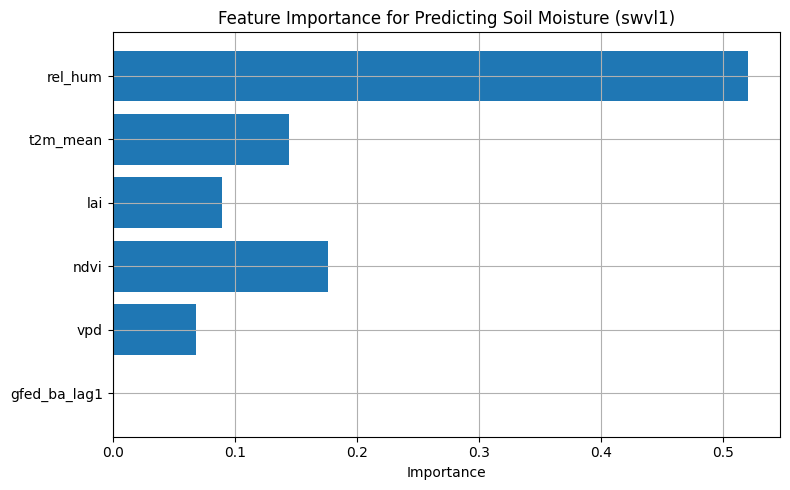

In [28]:
# Step 7: Feature Importance Plot
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("Feature Importance for Predicting Soil Moisture (swvl1)")
plt.xlabel("Importance")
plt.grid()
plt.tight_layout()
plt.show()